In [ ]:
# 민감도(TPR, True Positive Rate) - 1을 1로 잘 맞춘 비율, 재현율(recall)이라고도 함
# 특이도(FPR, False Positive Rate) - 실제값 0을 1로 잘못 예측한 비율, 위양성율(fall-out)이라고도 함
#   낮을수록 좋은 모형
# 예) 암진단 - 암환자를 암환자로 잘 진단한 경우, 암환자가 아닌데 암환자로 오진한 경우
# 민감도를 높이기 위해서는 True로 판단하는 기준(threshold)을 낮춘다.
# 그러면 False를 True로 판단하는 샘플이 증가하게 되어 특이도가 동시에 증가한다.
# 반대로 특이도를 낮추기 위해 True로 판단하는 기준을 높이면 민감도가 떨어진다.
# ROC(Receiver Operator Characteristic) 커브:
#   클래스 판별 기준값의 변화에 따른 민감도와 특이도의 변화를 시각화한 것
#   판별함수의 판별 기준값이 달라질 때 판별 결과가 어떻게 달라지는지를 표현한 그래프

In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=16, n_features=2, n_informative=2, n_redundant=0, random_state=10)

In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)
print(f_value)
print(model.predict(X))

[ 1.46512894 -1.03203074 -0.7355014   0.90163222  0.90811712 -1.10892301
  1.28523411 -2.9451636   1.29344604  2.10010735  2.4718164  -2.1000621
  0.16408684 -1.18284583 -0.64727888 -0.9956665 ]
[1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0]


In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier().fit(X,y)
# y_hat = model.predict(X)
# # f_value=model.decision_function(X) #트리 모형에는 판별함수가 없음
# # f_value

In [3]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
# f값을 내림차순으로 정렬
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.471816,1.0,1.0
1,2.100107,1.0,1.0
2,1.465129,1.0,1.0
3,1.293446,1.0,1.0
4,1.285234,1.0,0.0
5,0.908117,1.0,1.0
6,0.901632,1.0,1.0
7,0.164087,1.0,1.0
8,-0.647279,0.0,0.0
9,-0.735501,0.0,0.0


In [4]:
# 0을 기준으로 계산한 결과
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_hat, labels=[0,1])

array([[7, 1],
       [1, 7]], dtype=int64)

In [5]:
# 0을 기준으로 계산한 결과
# array([[7, 1],
#        [1, 7]], dtype=int64)
fpr0 = 1 / (7 + 1) # 0을 1로 잘못 분류한 값(특이도)
tpr0 = 7 / (1 + 7) # 1을 1로 잘 찾아낸 값(민감도, recall)
print(tpr0)
print(fpr0)

0.875
0.125


In [6]:
# 판별함수의 출력값에 따라 판별기준을 바꾸어 계산한 fpr,tpr
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, model.decision_function(X))
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([ 3.4718164 ,  2.4718164 ,  1.29344604,  1.28523411,  0.16408684,
        -0.9956665 , -1.03203074, -2.9451636 ]))

In [7]:
# 판별함수가 제공되지 않는 모형은 predict_proba() 함수를 사용할 수 있음
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
fpr, tpr, thresholds

(array([0.   , 0.   , 0.   , 0.125, 0.125, 0.5  , 0.5  , 1.   ]),
 array([0.   , 0.125, 0.5  , 0.5  , 0.875, 0.875, 1.   , 1.   ]),
 array([1.92214228, 0.92214228, 0.7847299 , 0.78333942, 0.54092992,
        0.26979429, 0.26269059, 0.04996559]))

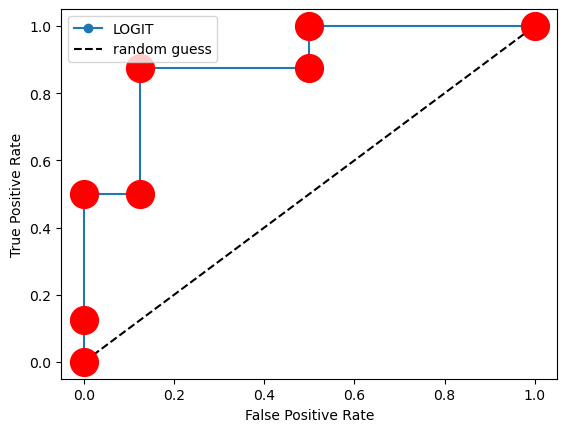

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="LOGIT")
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.plot([fpr], [tpr], 'ro', ms=20)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()